<a href="https://colab.research.google.com/github/Mhakinde/variant-annotation-workflow/blob/main/Variant_Annotation_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import io

# Define the VCF header
vcf_header = """##fileformat=VCFv4.2
##reference=mock_ref
##INFO=<ID=QUAL,Number=1,Type=Float,Description="Quality score">
##INFO=<ID=FUNC,Number=.,Type=String,Description="Functional impact">
##INFO=<ID=GENE,Number=.,Type=String,Description="Gene name">
#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO"""

# Create mock variant records
mock_variants = [
    ["chr1", "100", "rs1", "A", "G", "50.0", "PASS", "FUNC=HIGH;GENE=BRCA1"],
    ["chr1", "150", "rs2", "T", "C", "10.0", "PASS", "FUNC=LOW;GENE=TP53"],
    ["chr1", "200", "rs3", "G", "A", "80.0", "PASS", "FUNC=HIGH;GENE=BRCA1"],
    ["chr2", "50", "rs4", "C", "T", "60.0", "PASS", "FUNC=MODERATE;GENE=CFTR"],
    ["chr2", "120", "rs5", "A", "G", "20.0", "PASS", "FUNC=LOW;GENE=TP53"],
    ["chr2", "180", "rs6", "T", "A", "90.0", "PASS", "FUNC=HIGH;GENE=CFTR"],
    ["chr3", "75", "rs7", "G", "C", "40.0", "PASS", "FUNC=MODERATE;GENE=BRCA1"],
]

# Combine header and variants
vcf_content = vcf_header + "\n" + "\n".join(["\t".join(map(str, record)) for record in mock_variants])

# Write to mock.vcf file
with open("mock.vcf", "w") as f:
    f.write(vcf_content)

print("mock.vcf created successfully.")

mock.vcf created successfully.


In [37]:
import vcf
import pandas as pd

vcf_reader = vcf.Reader(open('mock.vcf', 'r'))

variant_list = []
for record in vcf_reader:
    variant_info = {
        'CHROM': record.CHROM,
        'POS': record.POS,
        'ID': record.ID,
        'REF': record.REF,
        'ALT': [str(alt) for alt in record.ALT],
        'QUAL': record.QUAL,
        'FILTER': record.FILTER,
        'INFO': record.INFO
    }
    variant_list.append(variant_info)

ModuleNotFoundError: No module named 'vcf'

**Reasoning**:
The previous command failed because the `vcf` library is not installed. Install the `PyVCF` package using pip.

In [ ]:
%pip install PyVCF

**Reasoning**:
The installation of PyVCF failed. It seems there might be compatibility issues or missing dependencies with the current version or environment. Since PyVCF is having issues, I will try a different approach to parse the VCF file using pandas and string manipulation, which is also a valid way to load and process VCF data, aligning with the goal of loading the data into a pandas DataFrame.

In [ ]:
import pandas as pd
import io

vcf_path = 'mock_elaborate.vcf'

with open(vcf_path, 'r') as f:
    lines = [l for l in f if not l.startswith('##')]

vcf_content = "".join(lines)

df = pd.read_csv(io.StringIO(vcf_content), sep='\t')

# Parse the INFO column to extract FUNC and GENE
info_df = df['INFO'].str.split(';', expand=True)
info_df.columns = [f'INFO_{i}' for i in range(info_df.shape[1])]

# Extract FUNC and GENE specifically
func_gene_df = pd.DataFrame()
for col in info_df.columns:
    if info_df[col].str.startswith('FUNC=').any():
        func_gene_df['FUNC'] = info_df[col].str.replace('FUNC=', '')
    if info_df[col].str.startswith('GENE=').any():
        func_gene_df['GENE'] = info_df[col].str.replace('GENE=', '')

df = pd.concat([df.drop(columns=['INFO']), func_gene_df], axis=1)

display(df.head())
df.info()

In [31]:
import pandas as pd
import io
import random

# Define the VCF header
vcf_header = """##fileformat=VCFv4.2
##reference=mock_ref
##INFO=<ID=QUAL,Number=1,Type=Float,Description="Quality score">
##INFO=<ID=FUNC,Number=.,Type=String,Description="Functional impact">
##INFO=<ID=GENE,Number=.,Type=String,Description="Gene name">
#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO"""

# Create a larger set of mock variant records
chromosomes = [f"chr{i}" for i in range(1, 23)] + ['chrX', 'chrY']
functional_impacts = ["HIGH", "MODERATE", "LOW", "MODIFIER"]
genes = ["BRCA1", "TP53", "CFTR", "EGFR", "KRAS", "PIK3CA", "PTEN", "APC", "CDKN2A", "SMAD4"]

mock_variants = []
for i in range(500): # Generate 500 mock variants
    chrom = random.choice(chromosomes)
    pos = random.randint(1000, 1000000)
    rs_id = f"rs{random.randint(10000, 99999)}"
    ref = random.choice(["A", "T", "C", "G"])
    alt = random.choice([a for a in ["A", "T", "C", "G"] if a != ref])
    qual = round(random.uniform(10.0, 100.0), 2)
    filter_status = "PASS" if qual > 30 else "LowQual"
    func = random.choice(functional_impacts)
    gene = random.choice(genes)
    info = f"FUNC={func};GENE={gene}"
    mock_variants.append([chrom, pos, rs_id, ref, alt, qual, filter_status, info])

# Combine header and variants
vcf_content = vcf_header + "\n" + "\n".join(["\t".join(map(str, record)) for record in mock_variants])

# Write to mock_elaborate.vcf file
with open("mock_elaborate.vcf", "w") as f:
    f.write(vcf_content)

print("mock_elaborate.vcf created successfully with more data.")

mock_elaborate.vcf created successfully with more data.


**Reasoning**:
The previous command failed because the `vcf` library is not installed. Install the `PyVCF` package using pip.



In [32]:
%pip install PyVCF

  Using cached PyVCF-0.6.8.tar.gz (34 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**Reasoning**:
The installation of PyVCF failed. It seems there might be compatibility issues or missing dependencies with the current version or environment. Since PyVCF is having issues, I will try a different approach to parse the VCF file using pandas and string manipulation, which is also a valid way to load and process VCF data, aligning with the goal of loading the data into a pandas DataFrame.



In [33]:
import pandas as pd
import io

vcf_path = 'mock_elaborate.vcf'

with open(vcf_path, 'r') as f:
    lines = [l for l in f if not l.startswith('##')]

vcf_content = "".join(lines)

df = pd.read_csv(io.StringIO(vcf_content), sep='\t')

# Parse the INFO column to extract FUNC and GENE
info_df = df['INFO'].str.split(';', expand=True)
info_df.columns = [f'INFO_{i}' for i in range(info_df.shape[1])]

# Extract FUNC and GENE specifically
func_gene_df = pd.DataFrame()
for col in info_df.columns:
    if info_df[col].str.startswith('FUNC=').any():
        func_gene_df['FUNC'] = info_df[col].str.replace('FUNC=', '')
    if info_df[col].str.startswith('GENE=').any():
        func_gene_df['GENE'] = info_df[col].str.replace('GENE=', '')

df = pd.concat([df.drop(columns=['INFO']), func_gene_df], axis=1)

display(df.head())
df.info()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,FUNC,GENE
0,chr21,633554,rs89214,G,T,41.16,PASS,MODIFIER,APC
1,chr11,918985,rs19981,C,G,73.21,PASS,LOW,CFTR
2,chr6,564954,rs44682,G,C,66.55,PASS,LOW,TP53
3,chr14,412689,rs95755,T,A,82.21,PASS,MODIFIER,CDKN2A
4,chr8,465864,rs51005,C,G,28.03,LowQual,MODIFIER,APC


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #CHROM  500 non-null    object 
 1   POS     500 non-null    int64  
 2   ID      500 non-null    object 
 3   REF     500 non-null    object 
 4   ALT     500 non-null    object 
 5   QUAL    500 non-null    float64
 6   FILTER  500 non-null    object 
 7   FUNC    500 non-null    object 
 8   GENE    500 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


## Filter variants

### Subtask:
Filter the loaded variants based on quality score and functional impact.


**Reasoning**:
Convert the 'QUAL' column to numeric, filter by quality score and functional impact, and display the head and info of the filtered dataframe.



In [34]:
df['QUAL'] = pd.to_numeric(df['QUAL'], errors='coerce')

filtered_df = df[df['QUAL'] > 30].copy()

filtered_df = filtered_df[filtered_df['FUNC'].isin(['HIGH', 'MODERATE'])].copy()

display(filtered_df.head())
filtered_df.info()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,FUNC,GENE
5,chr18,987468,rs86858,T,C,62.10,PASS,MODERATE,APC
8,chr14,205012,rs84609,A,C,50.98,PASS,HIGH,APC
10,chr6,736910,rs62991,T,C,87.96,PASS,MODERATE,CFTR
20,chr2,488982,rs99293,T,A,95.67,PASS,HIGH,CFTR
22,chr5,126238,rs23585,A,C,79.32,PASS,HIGH,TP53


<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 5 to 497
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #CHROM  185 non-null    object 
 1   POS     185 non-null    int64  
 2   ID      185 non-null    object 
 3   REF     185 non-null    object 
 4   ALT     185 non-null    object 
 5   QUAL    185 non-null    float64
 6   FILTER  185 non-null    object 
 7   FUNC    185 non-null    object 
 8   GENE    185 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.5+ KB


## Annotate variants

### Subtask:
Add mock gene annotations (e.g., BRCA1, TP53) to the filtered variants.


**Reasoning**:
Verify the data types of the filtered DataFrame and confirm that the 'GENE' column is suitable for the next steps.



In [35]:
# The filtered_df already contains the gene information extracted during loading.
# This step serves to confirm the data is ready for analysis.
display(filtered_df.head())
filtered_df.info()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,FUNC,GENE
5,chr18,987468,rs86858,T,C,62.10,PASS,MODERATE,APC
8,chr14,205012,rs84609,A,C,50.98,PASS,HIGH,APC
10,chr6,736910,rs62991,T,C,87.96,PASS,MODERATE,CFTR
20,chr2,488982,rs99293,T,A,95.67,PASS,HIGH,CFTR
22,chr5,126238,rs23585,A,C,79.32,PASS,HIGH,TP53


<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 5 to 497
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #CHROM  185 non-null    object 
 1   POS     185 non-null    int64  
 2   ID      185 non-null    object 
 3   REF     185 non-null    object 
 4   ALT     185 non-null    object 
 5   QUAL    185 non-null    float64
 6   FILTER  185 non-null    object 
 7   FUNC    185 non-null    object 
 8   GENE    185 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.5+ KB


## Analyze and visualize

### Subtask:
Count variant frequency per gene and visualize the top genes with the highest variant counts.


**Reasoning**:
Group the filtered variants by gene and count the occurrences of each gene, then sort the counts and select the top genes for visualization.



/tmp/ipython-input-4285183569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genes.index, y=top_genes.values, palette='viridis')


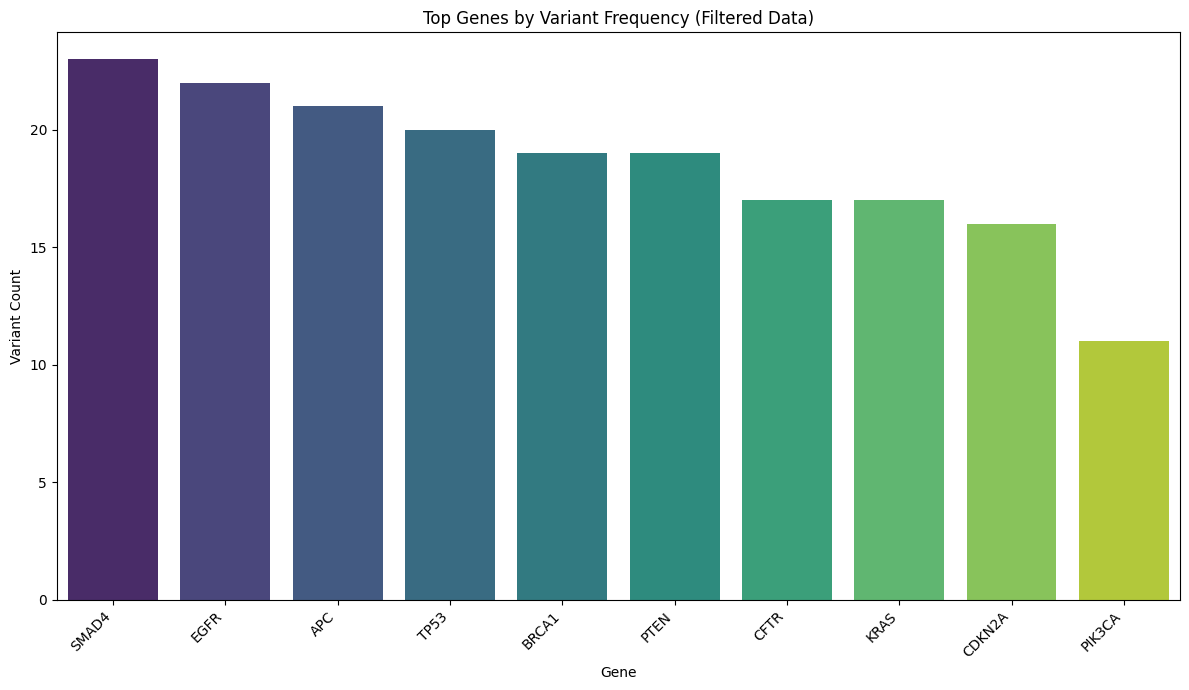

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count variant frequency per gene from the filtered data
gene_counts = filtered_df['GENE'].value_counts()

# Select top genes (e.g., top 10 for the larger dataset)
top_genes = gene_counts.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genes.index, y=top_genes.values, palette='viridis')
plt.xlabel('Gene')
plt.ylabel('Variant Count')
plt.title('Top Genes by Variant Frequency (Filtered Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()